In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.facecolor'] = 'silver'

### Dataset

[More datasets](https://scikit-learn.org/stable/datasets.html)

In [3]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

X = pd.DataFrame(california['data'], columns=california['feature_names'])
y = california['target']

display(X)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


The California Housing dataset is a popular dataset used in machine learning for regression tasks. 

It contains information collected from the 1990 California census. 

The dataset is often used to predict median house values in Californian districts, given various features.

Here's a breakdown

In [4]:
print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

#### Regression vs Classification

The most significant difference between regression vs classification is that while regression helps predict a continuous quantity, classification predicts discrete class labels.

![https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.linkedin.com%2Fpulse%2Faipart3regression-vs-classification-models-arnab-mukherjee&psig=AOvVaw3dmb_FYp3a82c49NIXzMbL&ust=1712769310972000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCIjc3YTRtYUDFQAAAAAdAAAAABAE](https://media.licdn.com/dms/image/D5612AQHleCueKC_lww/article-cover_image-shrink_600_2000/0/1677785069046?e=2147483647&v=beta&t=C6GRtT_VWW1c-WkYggBLllLx6Zxor1sSrM9lMW9FGdA)

### Decision Trees

[Decision trees](https://scikit-learn.org/stable/modules/tree.html) are a type of machine learning algorithm used for both classification and regression tasks. 

They mimic human decision-making processes by splitting data into branches at decision points, which makes them highly intuitive and easy to understand.

![https://regenerativetoday.com/wp-content/uploads/2022/04/dt.png](https://regenerativetoday.com/wp-content/uploads/2022/04/dt.png)

In [5]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

Split the dataset into training and test sets

We'll use `test_size=.25` (75% training, 25% testing) 

Because the split happens randomly across the data, let's use `random_state=42` so the split is reproducible.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

Initialize the regressor, train & predict

In [7]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)

(5160,)
[0.425   0.521   5.00001 ... 1.44    1.887   5.00001]


Model evaluation

[Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)

We can predict the accuracy of a decision tree regression model using mean square error (MSE).

As the name suggests, MSE finds the mean of all the squared errors.

It’s value lies between 0 to ∞. Lower the MSE, the closer is it’s prediction to actual.

[Coefficient of determination (R2 or R-squared)](https://en.wikipedia.org/wiki/Coefficient_of_determination)

R² tells you how much of the variation in your target variable can be explained by your model. An R² of 1 means your model perfectly predicts the target variable, while an R² of 0 means it does no better than simply predicting the mean of the target variable for all observations.

In [8]:
print('MSE')
print(f'Train: {mse(y_train, model.predict(X_train))}')
print(f'Test: {mse(y_test, model.predict(X_test))}')

print()

print('R2')
print(f'Train: {model.score(X_train, y_train)}')
print(f'Test: {model.score(X_test, y_test)}')

MSE
Train: 8.581665144652351e-32
Test: 0.5284515967758333

R2
Train: 1.0
Test: 0.6006315249060685


In [9]:
models, train_scores, test_scores = [], [], []
for d in tqdm(range(1, model.get_depth() + 1)):
    m = DecisionTreeRegressor(max_depth=d)
    m.fit(X_train, y_train)
    
    train_scores.append(mse(y_train, m.predict(X_train)))
    test_scores.append(mse(y_test, m.predict(X_test)))
    models.append(m)

100%|██████████| 36/36 [00:04<00:00,  8.83it/s]


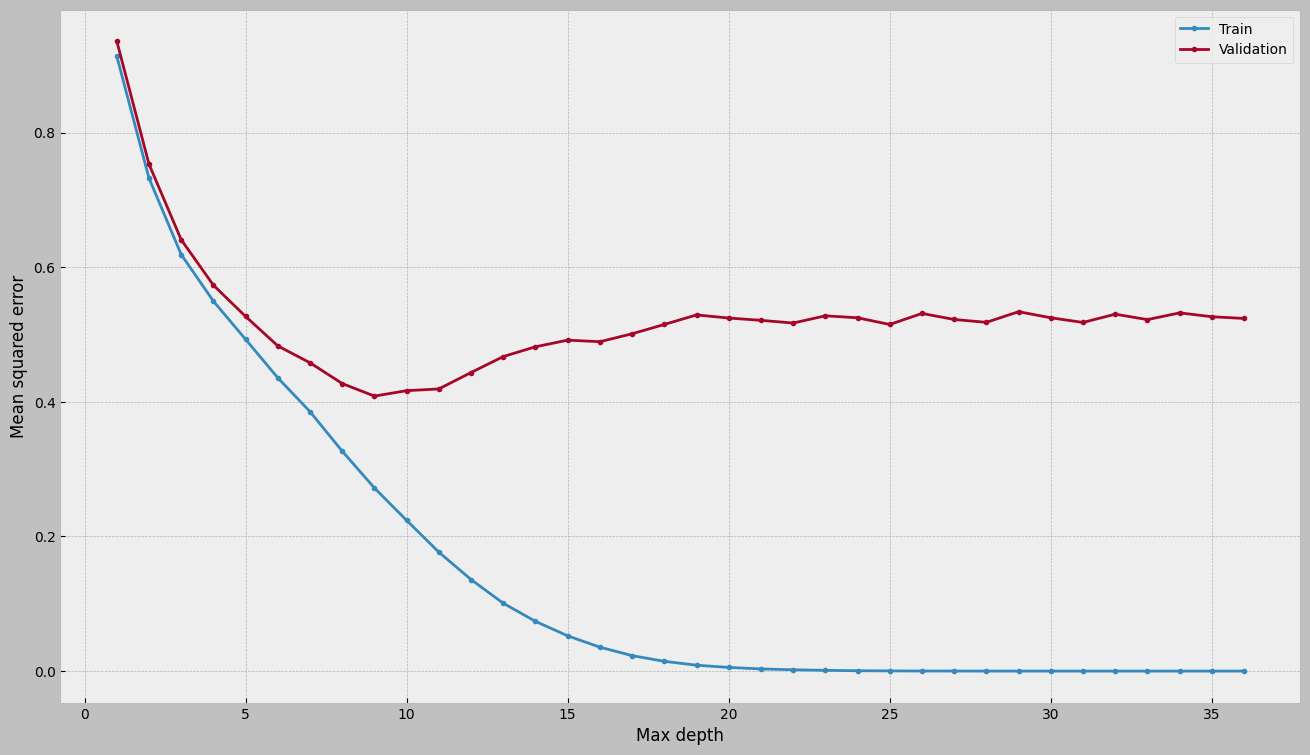

In [10]:
plt.plot(np.arange(model.get_depth()) + 1, train_scores, marker='.', label='Train')
plt.plot(np.arange(model.get_depth()) + 1, test_scores, marker='.', label="Validation")
plt.gca().set_xlabel('Max depth')
plt.gca().set_ylabel('Mean squared error')
plt.legend();

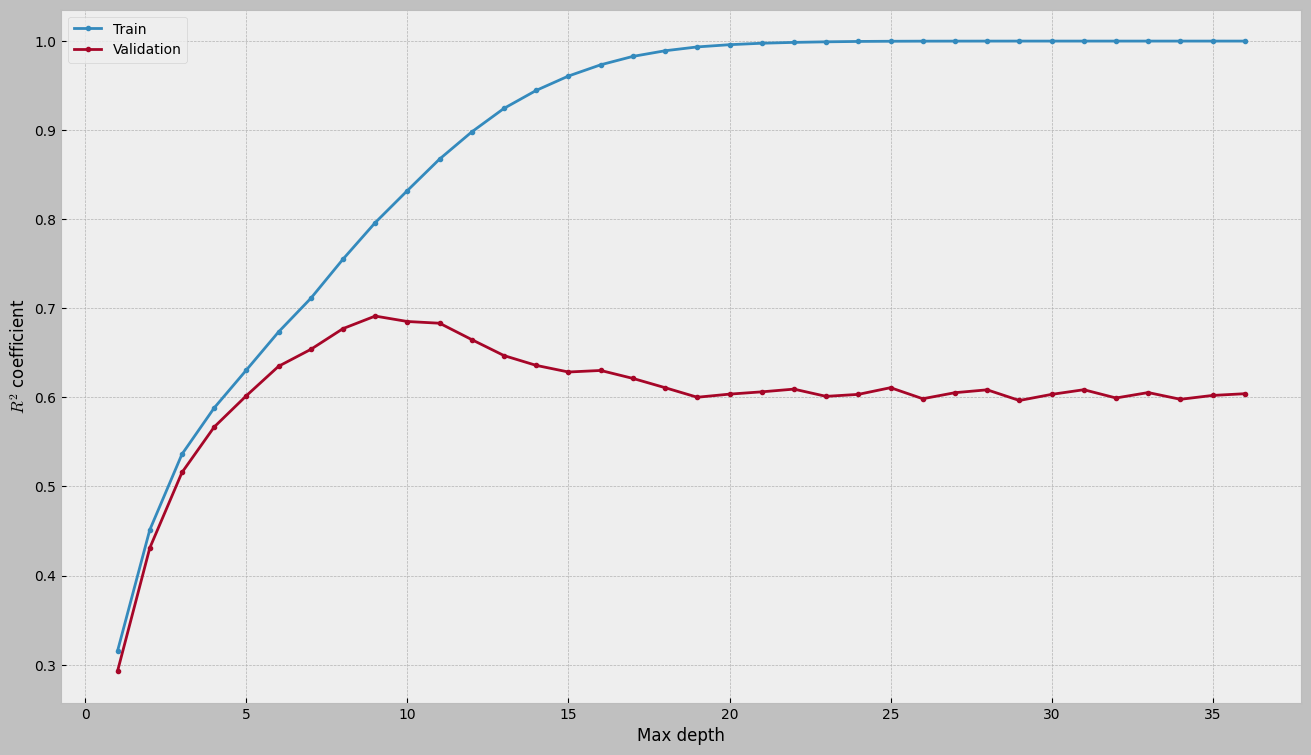

In [11]:
plt.plot(np.arange(model.get_depth()) + 1, [m.score(X_train, y_train) for m in models], marker='.', label='Train')
plt.plot(np.arange(model.get_depth()) + 1, [m.score(X_test, y_test) for m in models], marker='.', label='Validation')
plt.gca().set_xlabel('Max depth')
plt.gca().set_ylabel('$R^2$ coefficient')
plt.legend();

From the plots, we observe that as the maximum depth increases, the MSE for the training set decreases sharply at first, suggesting that the model is fitting the training data better with increased complexity. However, after a certain depth, the MSE for the training set remains relatively flat, which means that making the model more complex doesn't significantly improve performance on the training data.

Conversely, for the validation set, the MSE decreases as the tree depth increases initially, indicating that the model is generalizing better to unseen data. But after reaching an optimal point (around depth 10), the validation MSE starts to increase, signifying that the model is overfitting to the training data and its performance on unseen data is getting worse.

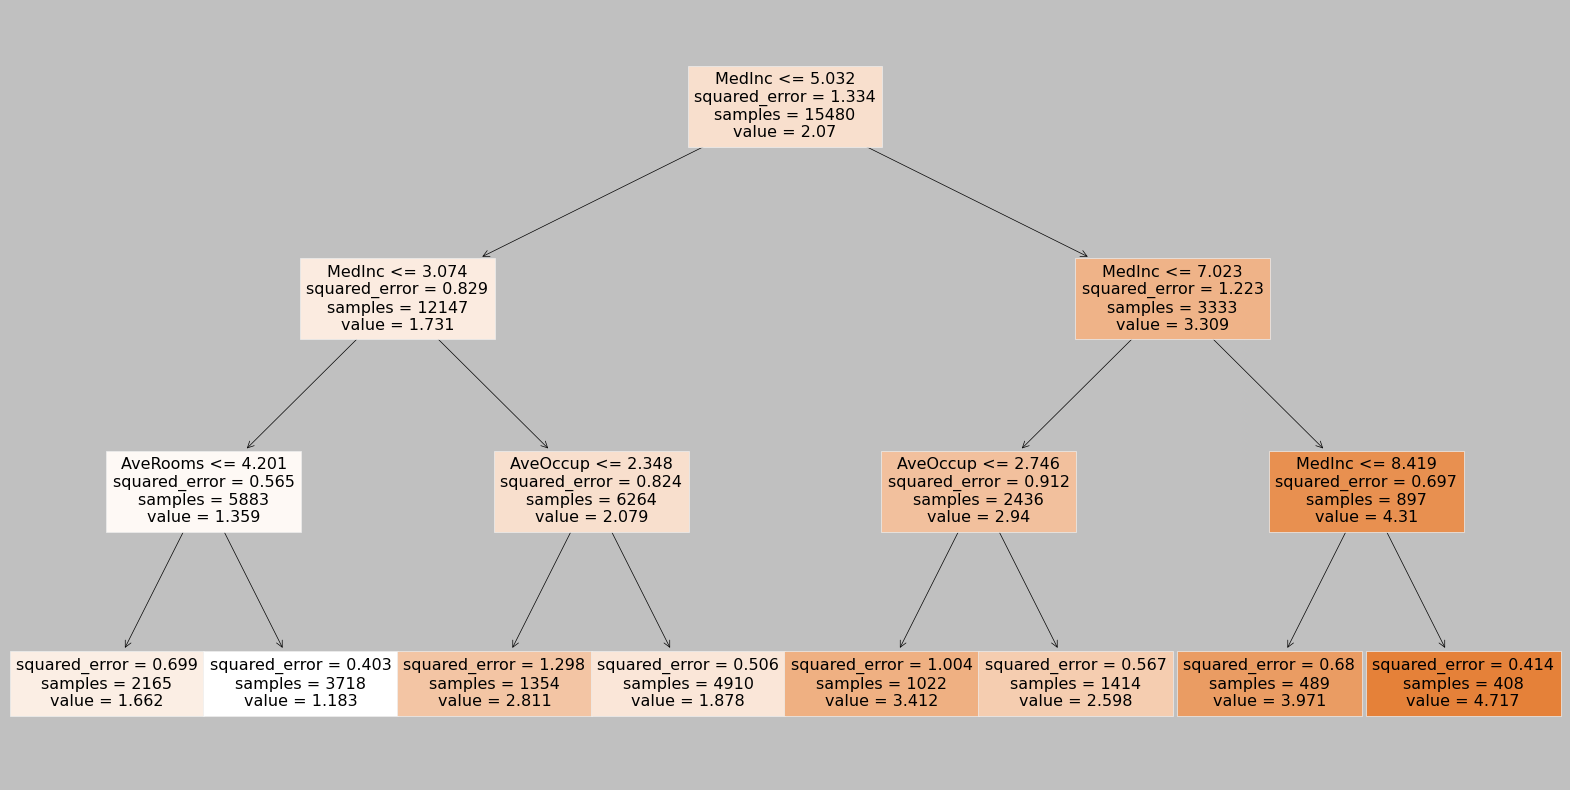

In [12]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(models[2], filled=True, feature_names=X.columns);

#### Decision stumps

A [decision stump](https://en.wikipedia.org/wiki/Decision_stump) is a machine learning model consisting of a one-level decision tree.

That is, it is a decision tree with one internal node (the root) which is immediately connected to the terminal nodes (its leaves).

A decision stump makes a prediction based on the value of just a single input feature.

Due to their simplicity, decision stumps can be effectively used for feature selection.

Since a decision stump makes a split based on a single feature, its performance can give insights into the predictive power of that feature.

In high-dimensional datasets, using decision stumps to evaluate the importance of features can be a computationally efficient way to identify relevant features.

![https://en.wikipedia.org/wiki/Decision_stump#/media/File:Decision_stump.svg](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Decision_stump.svg/1920px-Decision_stump.svg.png)

An example of a decision stump that discriminates between two of three classes of Iris flower data set: Iris versicolor and Iris virginica. 

The petal width is in centimetres. This particular stump achieves 94% accuracy on the Iris dataset for these two classes.

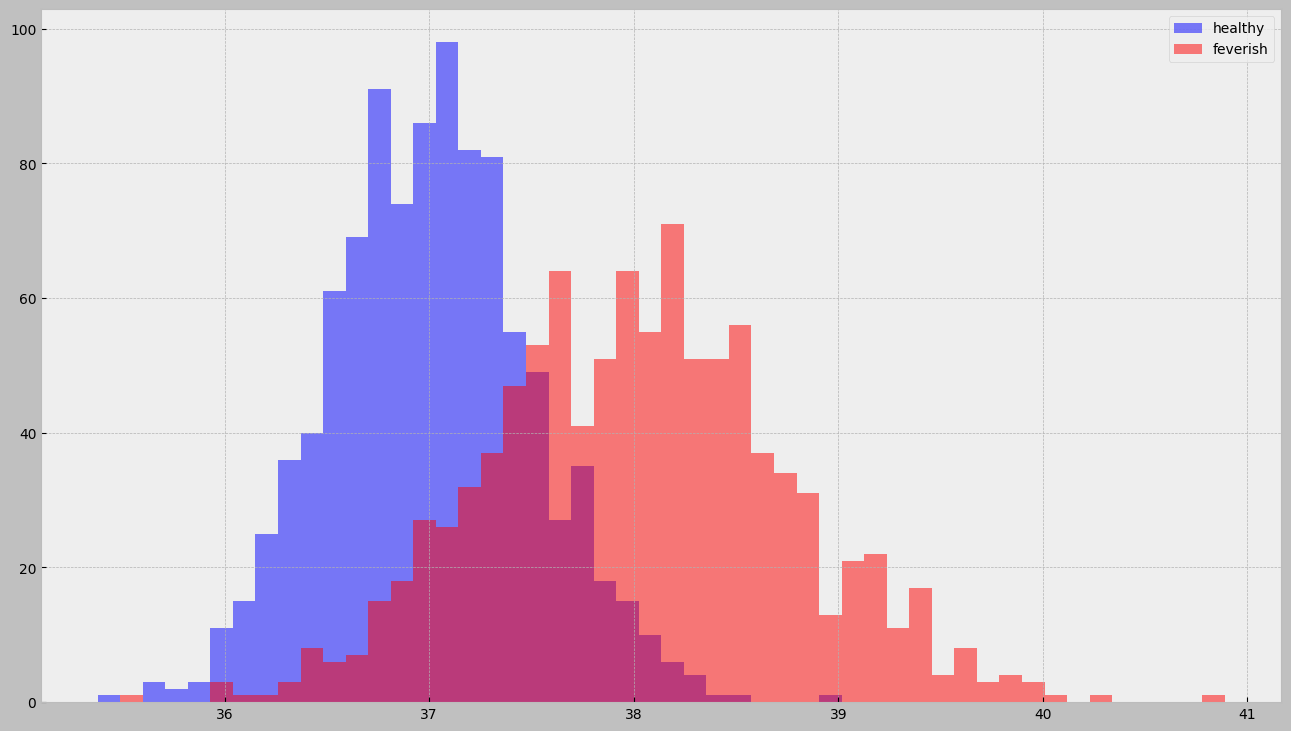

In [13]:
from scipy.stats import norm

random_state = 42

healthy_temp = norm(loc=37, scale=.5).rvs(size=1000, random_state=random_state)
fever_temp = norm(loc=38, scale=.75).rvs(size=1000, random_state=random_state)
temps = np.concatenate([healthy_temp, fever_temp])
has_fever = np.concatenate([np.zeros_like(healthy_temp), np.ones_like(fever_temp)])

plt.hist(healthy_temp, label='healthy', bins=50, range=(temps.min(), temps.max()), color='b', alpha=.5)
plt.hist(fever_temp, label='feverish', bins=50, range=(temps.min(), temps.max()), color='r', alpha=.5)
plt.legend();

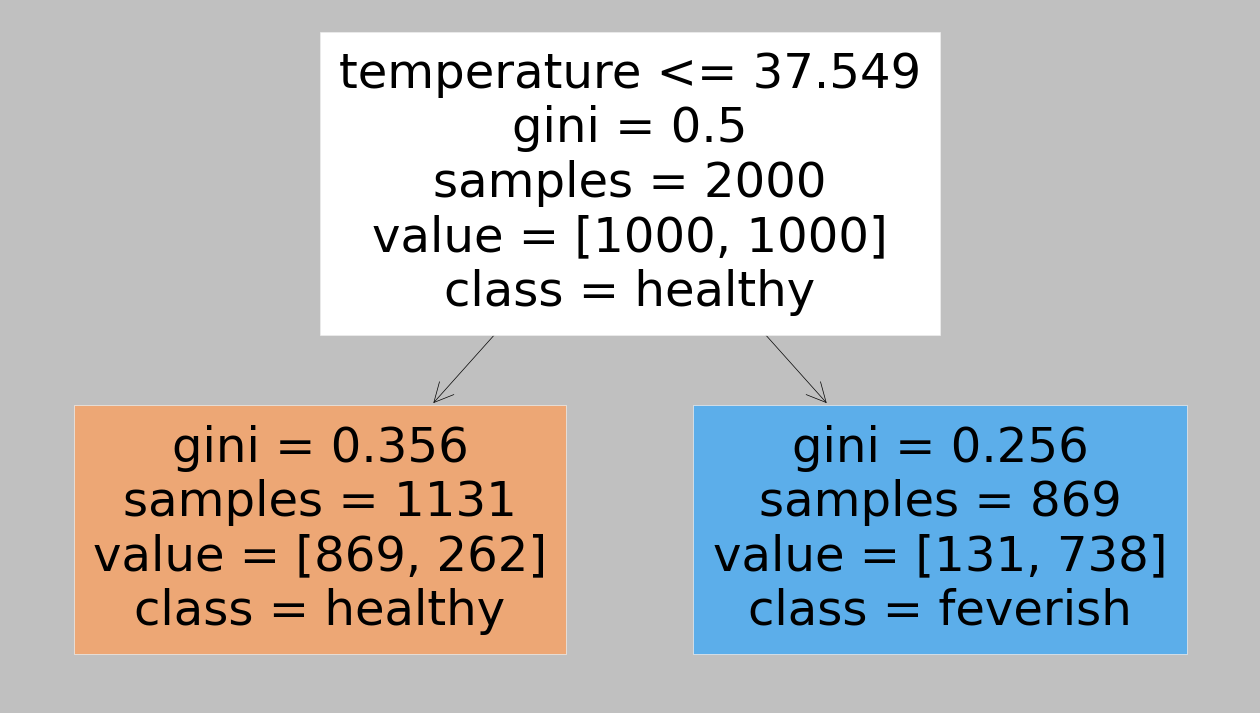

In [14]:
X, y = temps.reshape(-1, 1), has_fever
decision_stump = DecisionTreeClassifier(max_depth=1)
decision_stump.fit(X, y)
plot_tree(decision_stump, filled=True, feature_names=['temperature'], class_names=['healthy', 'feverish']);

Root Node:
- *Splitting Criterion*: The decision stump splits the data based on the temperature feature at a threshold of ~37.54. This means that if the temperature is less than or equal to ~37.54, it will go to the left child node; otherwise, it will go to the right child node.
- *Gini Index*: The Gini index at the root is 0.5, which indicates a perfect split — meaning that the data was evenly split between the two classes at this node.
- *Samples*: This node contains all 2000 samples before the split.
- *Value*: The value [1000, 1000] suggests that there were an equal number of samples from both classes (`healthy` and `feverish`) at this node.
- *Class*: The class label here is `healthy`, which likely indicates the majority class at this node or the default prediction in case of a tie.

Left Child Node:
- *Gini Index*: The value implies some degree of impurity in the node; however, this is less than the root node's Gini index, indicating that the split has achieved some degree of separation between the classes.
- *Class*: The class is `healthy`, meaning that this node predicts `healthy` because the majority of samples fall into the `healthy` category.

Right Child Node:
- *Gini Index*: The value is lower than the root's, which again indicates that this split is helpful in separating the classes.
- *Class*: The class is `feverish`, indicating that the majority of samples in this node are from the `feverish` class.

#### Gini impurity
[Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) measures how often a randomly chosen element of a set would be incorrectly labeled if it were labeled randomly and independently according to the distribution of labels in the set

Splitting by body temperature of 37.5C, averages on 31.26% chance of mislabeling


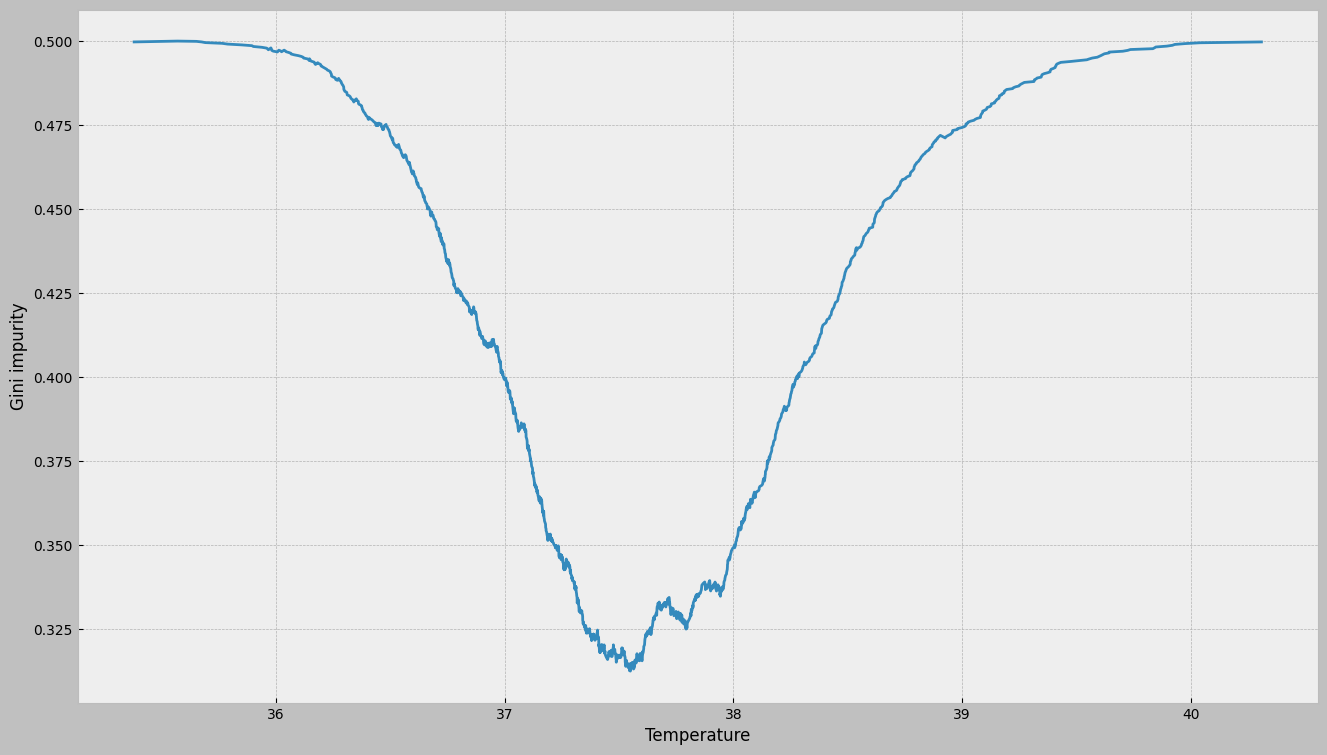

In [15]:
def gini_impurity(labels):
    _, frequencies = np.unique(labels, return_counts=True)
    frequencies = frequencies / frequencies.sum()
    return 1 - np.sum(frequencies ** 2)

impurities = []
for value in np.sort(temps)[:-1]:
    mask = temps <= value
    gl = gini_impurity(has_fever[mask])
    gr = gini_impurity(has_fever[~mask])
    impurities.append(gl * np.mean(mask) + gr * np.mean(~mask))

plt.plot(np.sort(temps)[:-1], impurities)
plt.gca().set_xlabel('Temperature')
plt.gca().set_ylabel('Gini impurity')
idx = np.argmin(impurities)
prc = impurities[idx]
split_value = np.sort(temps)[idx]
print(f'Splitting by body temperature of {split_value:.1f}C, averages on {prc:.2%} chance of mislabeling')

The provided plot visualizes the Gini impurity for different split points. The valley in the plot indicates the split point with the lowest impurity, which corresponds to the best division between healthy and feverish samples based on temperature. Splitting by a body temperature equal to `split_value` minimizes mislabeling to an average chance of `prc`%. This means that if you classified someone as having a fever based on a temperature greater than `split_value`, you would be wrong about `prc`% of the time, according to this model and the synthetic data generated.

[869 262] [131 738]


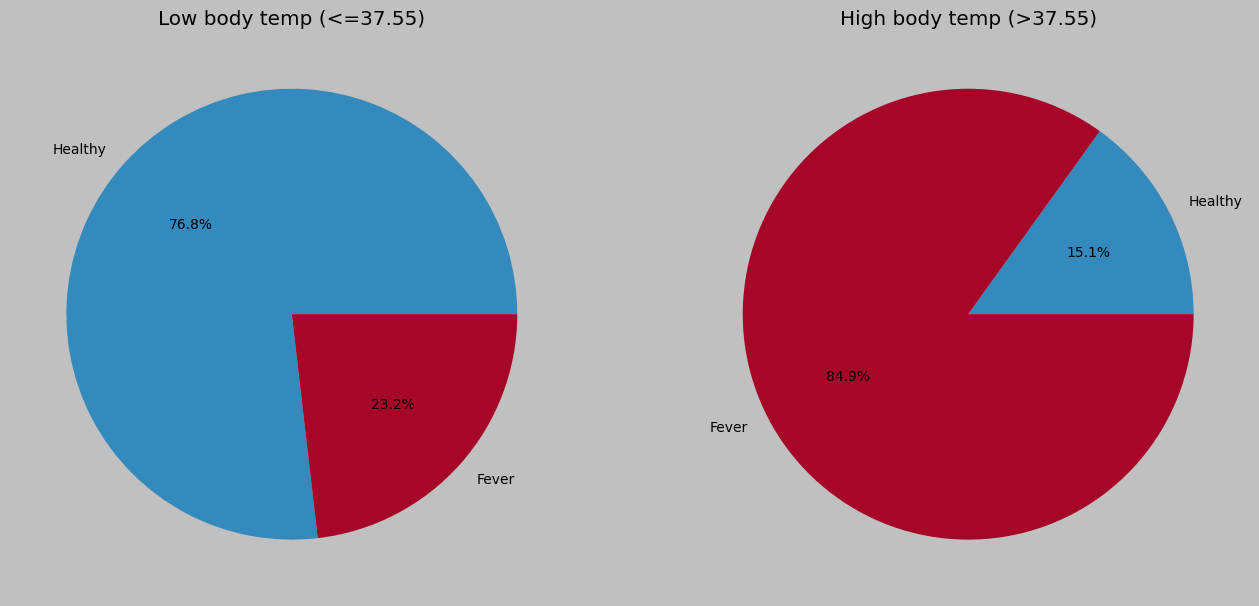

In [16]:
_, lo_temp = np.unique(has_fever[temps <= split_value], return_counts=True)
_, hi_temp = np.unique(has_fever[temps > split_value], return_counts=True)
print(lo_temp, hi_temp)

fig, (ax0, ax1) = plt.subplots(ncols=2)
ax0.set_title(f'Low body temp (<={split_value:.2f})')
ax1.set_title(f'High body temp (>{split_value:.2f})')
ax0.pie(lo_temp, labels=['Healthy', 'Fever'], autopct='%1.1f%%')
ax1.pie(hi_temp, labels=['Healthy', 'Fever'], autopct='%1.1f%%');

,height,weight,gender
0,1.684770,63.439327,F
1,1.640321,58.917873,F
2,1.695338,64.527152,F
3,1.756612,70.931152,F
4,1.633609,58.242636,F
...,...,...,...
1995,1.724701,79.189622,M
1996,1.911792,105.874338,M
1997,1.807676,90.791056,M
1998,1.698594,75.616257,M


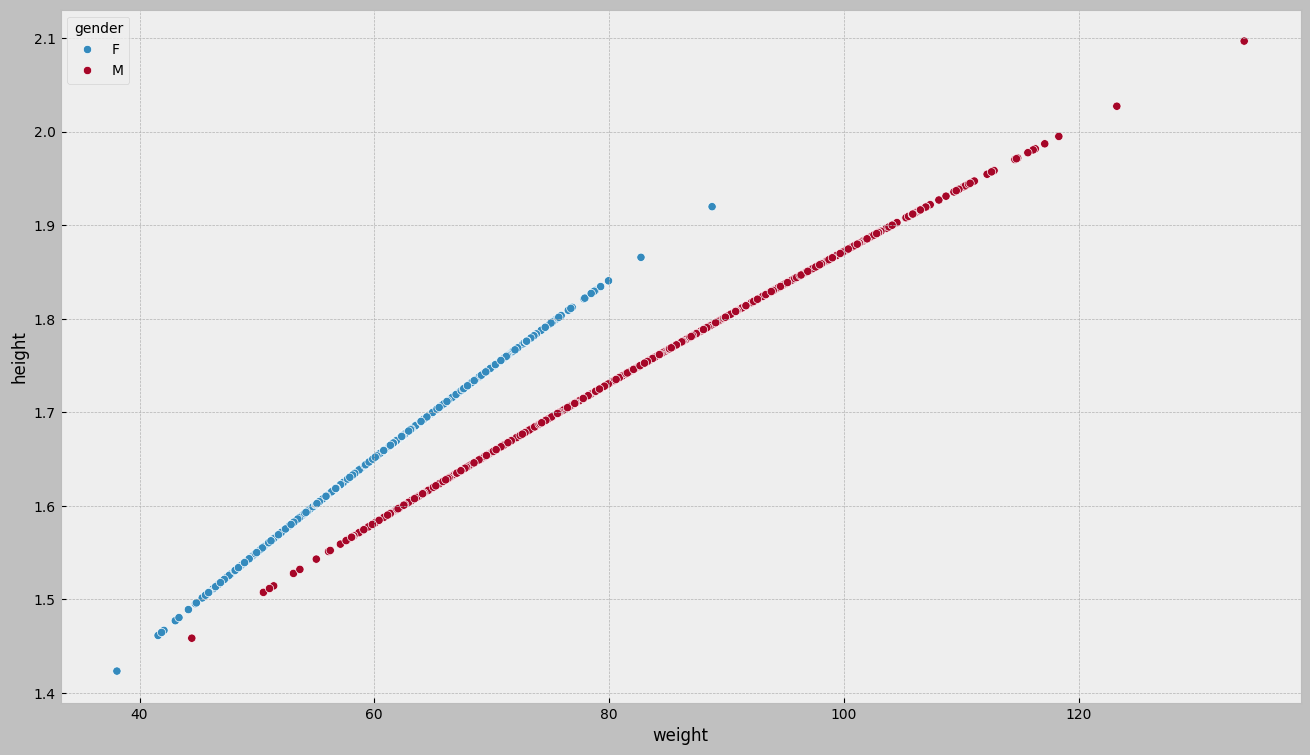

In [17]:
fh = norm(loc=1.65, scale=.07).rvs(size=1000, random_state=random_state)
mh = norm(loc=1.75, scale=.09).rvs(size=1000, random_state=random_state)

fw = 22 * fh ** 2 + norm(scale=2).rvs(size=1000, random_state=random_state)
mw = 27 * mh ** 2 + norm(scale=4).rvs(size=1000, random_state=random_state)

df = pd.DataFrame({'height': np.concatenate([fh, mh]), 'weight': np.concatenate([fw, mw]), 'gender': 1000 * ['F'] + 1000 * ['M']})
display(df)

sns.scatterplot(x='weight', y='height', hue='gender', data=df)
plt.show()

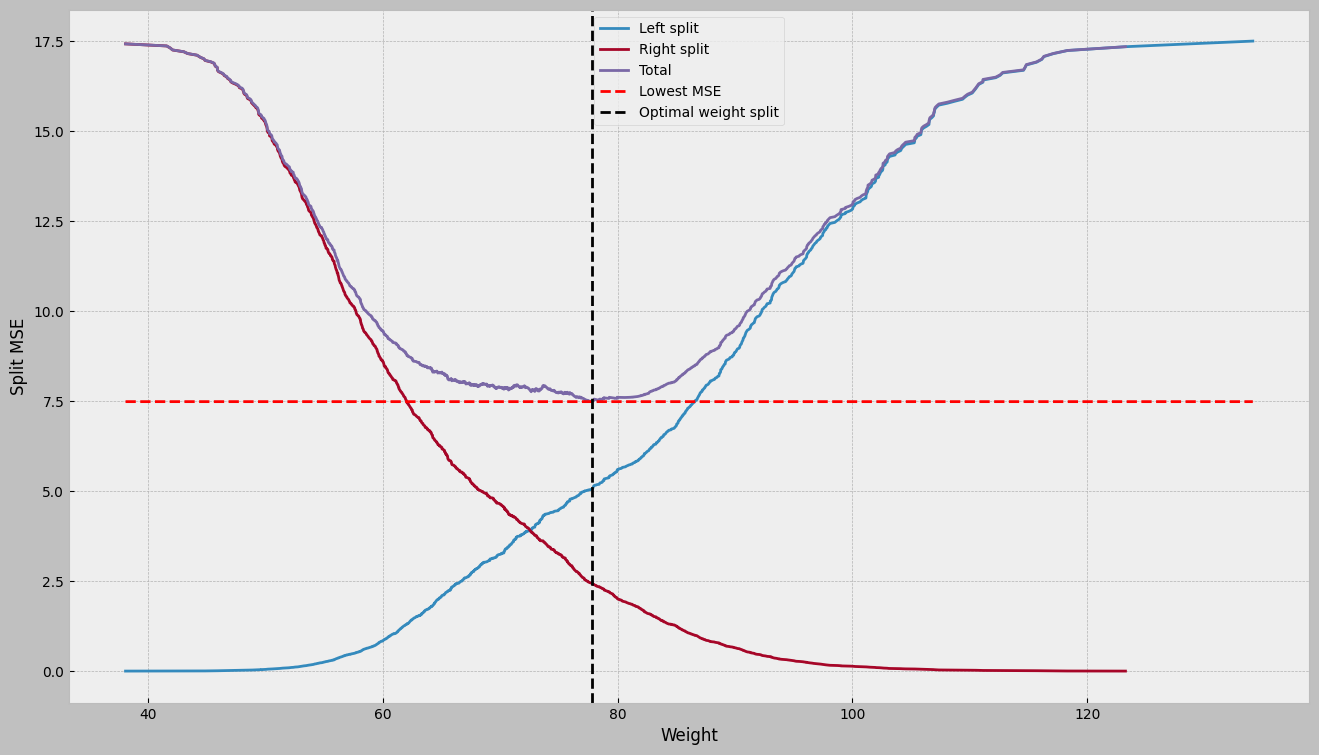

In [18]:
# Operatiile de pandas care suporta `inplace` nu vor returna nimic cand inplace=True
# Cand inplace=False (default), returneaza o copie asupra careia s-a aplicat modificarea

# df = df.sort_values(by='weight')
df.sort_values(by='weight', inplace=True)

l_n = np.arange(len(df)) + 1
l_sum = df['height'].cumsum()
l_ssum = (df['height'] ** 2).cumsum()

r_n = l_n[-1] - l_n
r_sum = l_sum.iloc[-1] - l_sum
r_ssum =  l_ssum.iloc[-1] - l_ssum

l_se = l_ssum - (l_sum ** 2) / l_n
r_se = r_ssum - (r_sum ** 2) / r_n

plt.plot(df['weight'], l_se, label='Left split')
plt.plot(df['weight'], r_se, label='Right split')
plt.plot(df['weight'], l_se + r_se, label='Total')
plt.plot(df['weight'], (l_se + r_se).min() * np.ones_like(df['weight']), linestyle='--', color='r', label='Lowest MSE')
idx_min_mse = (l_se + r_se).idxmin()
weight_min_mse = df['weight'][idx_min_mse]
plt.axvline(x=weight_min_mse, linestyle='--', color='k', label='Optimal weight split')

plt.xlabel('Weight')
plt.ylabel('Split MSE')
plt.legend();

The `total` line shows the sum of the MSEs of the left and right groups. 

The minimum point on this line represents the optimal split, where the variance within the two resulting groups is minimized. 

This is the weight value that best separates the data into two distinct groups (by height), given the trend that, on average, males are taller and heavier than females.


# Random Forests

A random forest is an ensemble machine-learning model that is composed of multiple decision trees. A decision tree is a model that makes predictions by learning a series of simple decision rules based on the features of the data. A random forest combines the predictions of multiple decision trees to make more accurate and robust predictions.

In [19]:
from sklearn.ensemble import RandomForestRegressor

OOB (out-of-bag) score is a performance metric for a machine learning model, specifically for ensemble models such as random forests. It is calculated using the samples that are not used in the training of the model, which is called out-of-bag samples. These samples are used to provide an unbiased estimate of the model’s performance, which is known as the OOB score.

In [20]:
rf = RandomForestRegressor(oob_score=True)
rf.fit(X_train, y_train)

print(f'Train: {rf.score(X_train, y_train)}')
print(f'Validation: {rf.score(X_test, y_test)}')
print(f'OOB: {rf.oob_score_}')

Train: 0.9730153085702649
Validation: 0.8085915118458844
OOB: 0.8041730309222954


The OOB score is calculated using out-of-bag samples and is a measure of the model’s performance on unseen data. The validation score, on the other hand, is a measure of the model’s performance on a validation dataset, which is a set of samples that the model has not seen during training.

100%|██████████| 30/30 [00:46<00:00,  1.56s/it]


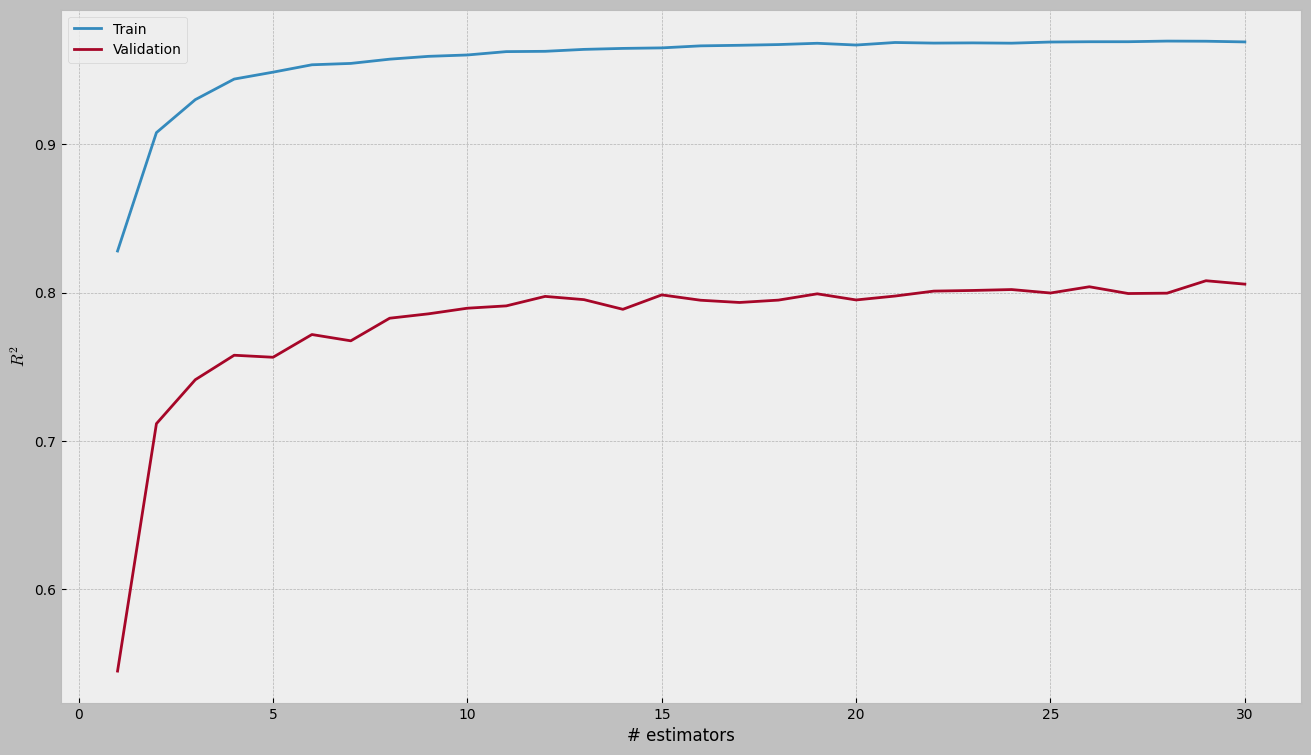

In [21]:
trn, val, oob = [], [], []
for n in tqdm(1 + np.arange(30)):
    rf = RandomForestRegressor(n_estimators=n)
    rf.fit(X_train, y_train)
    trn.append(rf.score(X_train, y_train))
    val.append(rf.score(X_test, y_test))
    
plt.plot(1 + np.arange(30), trn, label='Train')
plt.plot(1 + np.arange(30), val, label='Validation')
plt.gca().set_xlabel('# estimators')
plt.gca().set_ylabel('$R^2$')
plt.legend()
plt.show()

100%|██████████| 19/19 [00:08<00:00,  2.21it/s]


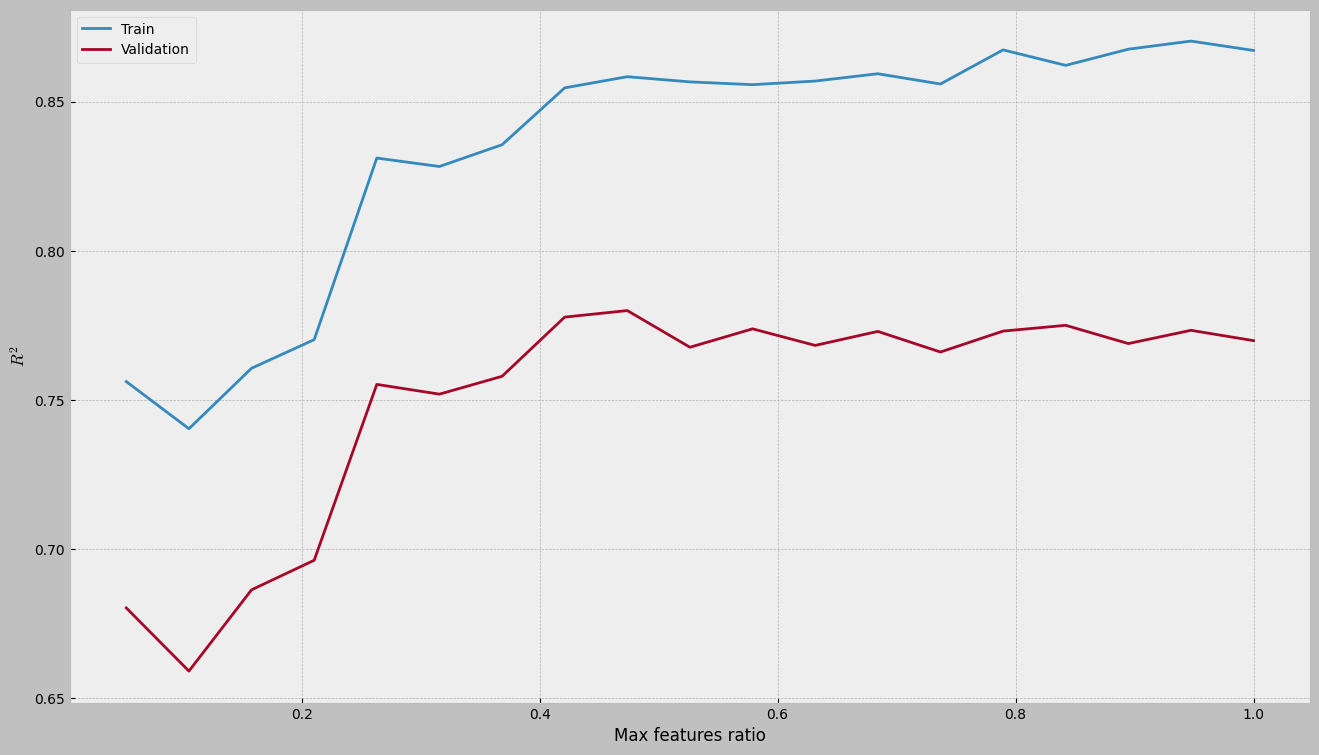

In [22]:
trn, val = [], []
x = np.linspace(0, 1, 20)[1:]
for mf in tqdm(x):
    rf = RandomForestRegressor(n_estimators=15, max_features=mf, max_depth=10)
    rf.fit(X_train, y_train)
    
    trn.append(rf.score(X_train, y_train))
    val.append(rf.score(X_test, y_test))
    
plt.plot(x, trn, label='Train')
plt.plot(x, val, label='Validation')
plt.gca().set_xlabel('Max features ratio')
plt.gca().set_ylabel('$R^2$')
plt.legend();

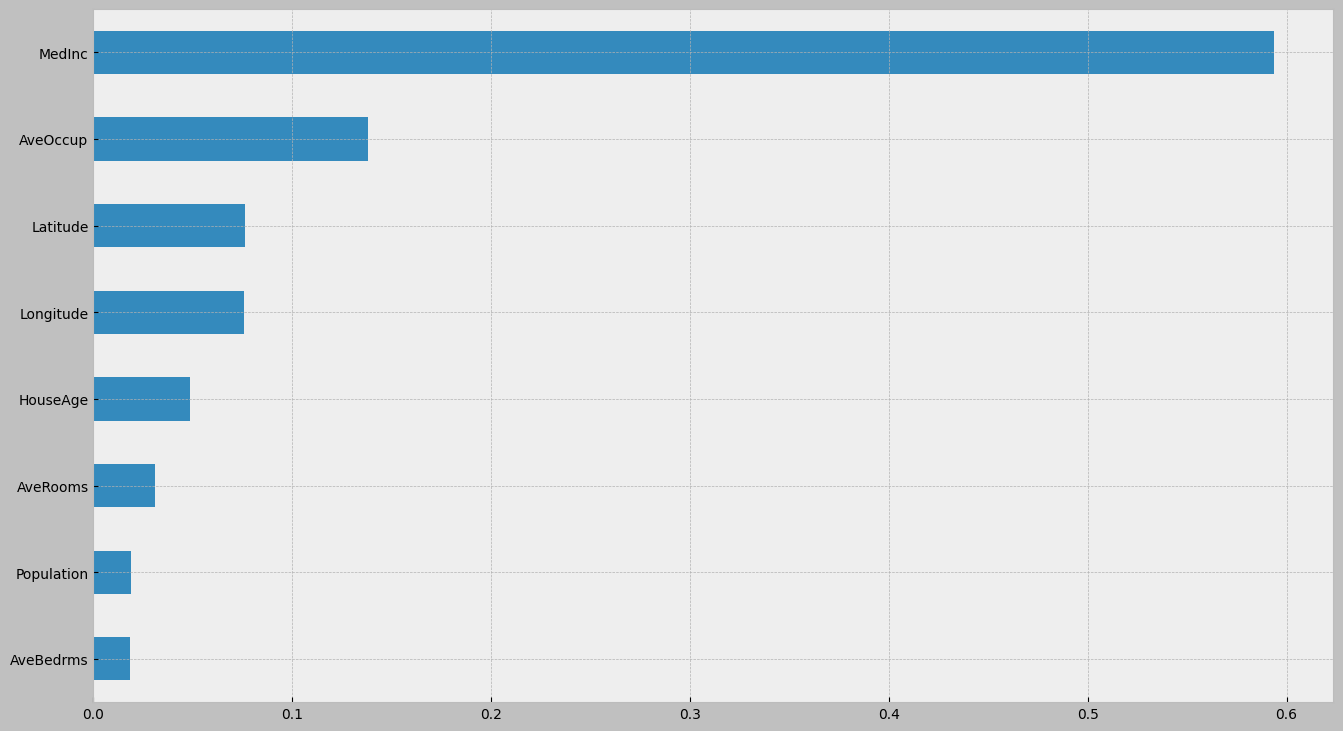

In [23]:
pd.Series(rf.feature_importances_, index=california['feature_names']).sort_values().plot.barh();

# K nearest neighbors

Supervised machine learning classification alogirthm
- Does not make assumptions about underlying data
- Easy to implement
- Adapts easily
- Few hyperparameters
- Does not scale
- Hard time classifying highdimensional datapoints
- Prone to overfitting, feature selection & dimensionality reduction techniques are applied

The value of k (odd number recommended to avoid ties) is chosen based on the input data, noisier data requires higher value of k.
Use [cross-validation](https://www.geeksforgeeks.org/cross-validation-machine-learning/) to select the best k

![https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fk-nearest-neighbor-knn-algorithm-3d16dc5c45ef&psig=AOvVaw28_pSziZF2JyxtC8EN3tAr&ust=1712839965186000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCPjh-J7Yt4UDFQAAAAAdAAAAABA5](https://miro.medium.com/v2/resize:fit:1400/1*_r-PcPEK7css8UDINDgkgg.gif)

In [24]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier as _

knn_models = []
trn, val = [], []
for k in tqdm(range(1, 50)):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_models.append(knn)
    trn.append(knn.score(X_train, y_train))
    val.append(knn.score(X_test, y_test))

100%|██████████| 49/49 [00:05<00:00,  9.00it/s]


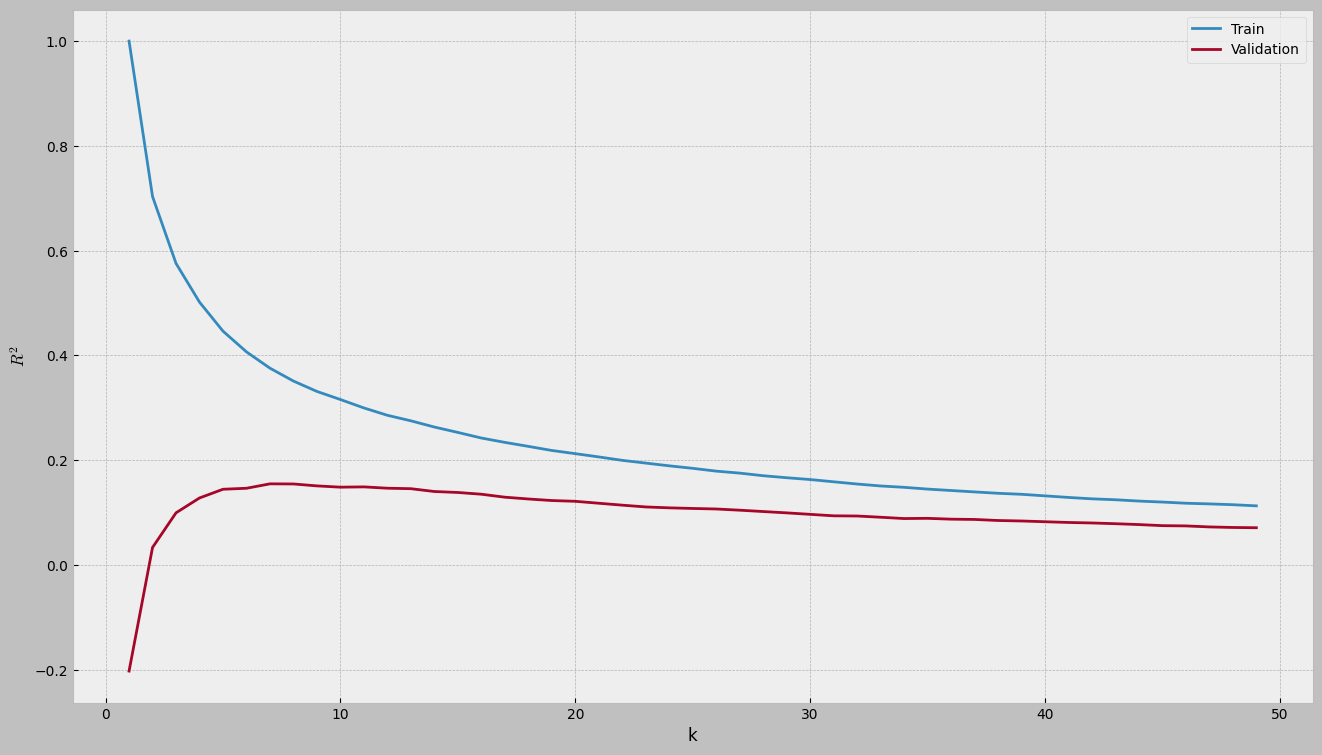

In [25]:
plt.plot([knn.n_neighbors for knn in knn_models], trn, label='Train')
plt.plot([knn.n_neighbors for knn in knn_models], val, label='Validation')
plt.gca().set_xlabel('k')
plt.gca().set_ylabel('$R^2$')
plt.legend();

Pentru ca opereaza pe distante intre puncte de date, KNN e sensibil la diferenta de dispersie de la un feature la altul.
De exemplu, distanta de la un individ de 20 de ani cu inaltimea 1.85m la unul de 40 de ani de 1.65m va fi dominata de varsta.

$(20-40)^2$ e mult mai mare decat $(1.85-1.65)^2$

Pentru a atenua acest efect, putem folosi un StandardScaler, ca sa ne asiguram ca distantele vor fi mereu exprimate in termeni de deviatii standard.

100%|██████████| 49/49 [00:49<00:00,  1.01s/it]


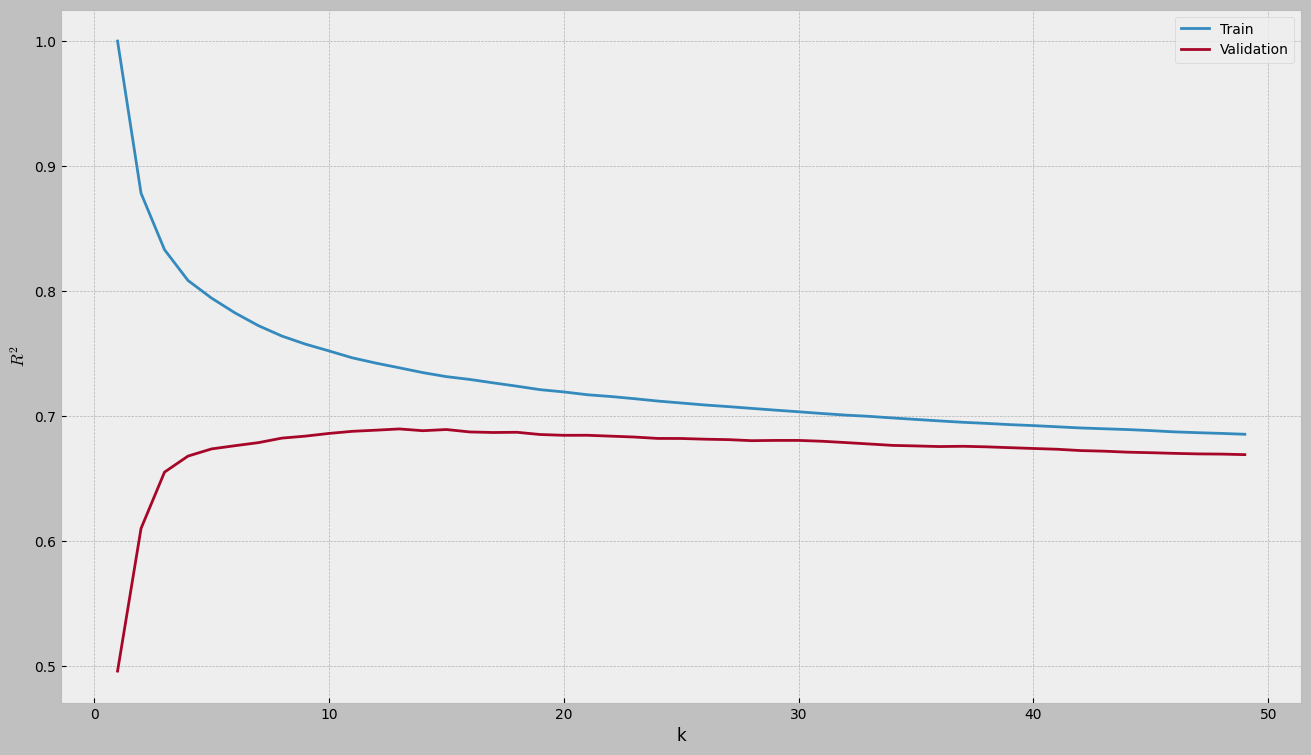

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# scaler.transform ~= (X - X.mean) / X.std
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

knn_models = []
trn, val = [], []
for k in tqdm(range(1, 50)):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_s, y_train)
    knn_models.append(knn)
    
    trn.append(knn.score(X_train_s, y_train))
    val.append(knn.score(X_test_s, y_test))
    
plt.plot([knn.n_neighbors for knn in knn_models], trn, label='Train')
plt.plot([knn.n_neighbors for knn in knn_models], val, label='Validation')
plt.gca().set_xlabel('k')
plt.gca().set_ylabel('$R^2$')
plt.legend();

### Further reading

#### [Classifier comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
Different classifiers illustrated on synthetic datasets
![Classifier comparison](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

#### [Single estimator versus bagging: bias-variance decomposition](https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html)

While a single decision tree might adhere too closely to the training data (low bias but high variance), a bagging ensemble can offer a more generalizable model by reducing variance at a small cost of increased bias.

The total error consists of bias squared, variance, and irreducible error (noise). By reducing variance more than bias increases, bagging can lower the total error.